In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, "savefig.dpi":300})
sns.set_context("notebook")
sns.set_style("ticks")

# Discrete Random Variables in Python

## Objectives
+ To develop intuition about the probability mass function.
+ To learn about the Binomial distribution.
+ To learn about the Poisson distribution.

## The Bernoulli Distribution

The Bernoulli distribution generalizes the concept of a coin toss.
You can think of it as the result of an experiment with two possible outcomes $0$ and $1$.
One just needs to specify the probability of one of the outcomes, typically the probability of zero.
So, how do we denote mathematically a Bernoulli random variable $X$ that takes the value $1$ with probability $\theta$ in $[0,1]$?
We can write:

$$
X = \begin{cases} 1,\;\text{with probability}\;\theta,\\
0,\;\text{otherwise}.
\end{cases}
$$

Notice that in defining this random variable we are ignoring the mechanism that is giving rise to it.
This is ok. It just means that we have decided to not look into it.
The other way we can write this is as follows:

$$
X \sim \operatorname{Bernoulli}(\theta).
$$

Let's use the functionality of ``scipy.stats`` to define a Bernoulli random variable and sample from it.

In [2]:
# Import the scipy.stats library
import scipy.stats as st
# This is the probability of 1:
theta = 0.6
# Define the random variable, Bernoulli(theta)
X = st.bernoulli(theta)

Here is the **support** of the random variable.
It tells you which values it takes:

In [3]:
print("X takes values in", X.support())

X takes values in (0, 1)


Evaluate the probability mass function at every point of the support:

In [4]:
for x in X.support():
    print(f"p(X={x}) = {X.pmf(x):.2f}")

p(X=0) = 0.40
p(X=1) = 0.60


The expectation of the Bernoulli:

In [5]:
print(f"E[X] = {X.expect():1.2f}")

E[X] = 0.60


The variance of the Bernoulli:

In [6]:
print(f"V[X] = {X.var():1.2f}")

V[X] = 0.24


Here is how to sample the random variable 10 times:

In [7]:
xs = X.rvs(size=10)
print(f"samples: {xs}")

samples: [1 1 0 0 0 1 1 1 1 1]


Let's plot the histogram of these samples (simply counts how many samples are zero or one):

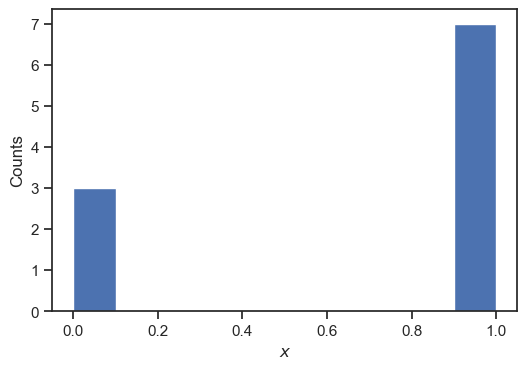

In [8]:
fig, ax = plt.subplots()
ax.hist(xs)
ax.set_xlabel("$x$")
ax.set_ylabel("Counts");

Compare the histogram to the graph of the probability mass function:

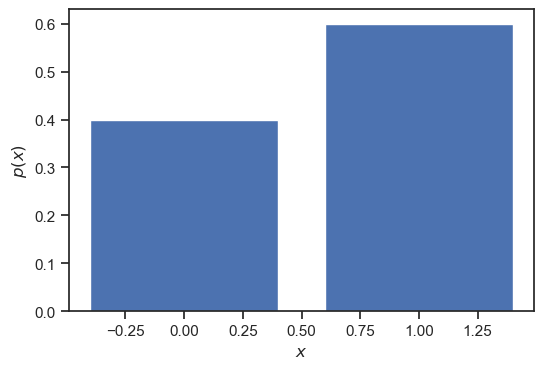

In [9]:
fig, ax = plt.subplots()
ax.bar(X.support(), X.pmf(X.support()))
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$");

### Questions
+ Modify the code above to take $1000$ samples from the random variable instead of just 10.
+ Rerun the code above for $\theta = 0.8$.

## The Categorical Distribution

This is a generalization of the Bernoulli also known as *multinulli*.
It is the probability distribution assigned to a random variable taking $K$ different values each one with a given, but different, probability.
It is:

$$
p(X=k) = p_k.
$$

For example, if all the different values are equally probably, then we could have:

$$
p(X=k) = \frac{1}{K}.
$$

Let's see how we can sample from it.

In [10]:
# Define the probabilities:
ps = [0.1, 0.3, 0.4, 0.2] 
# And here are the corresponding values
xs = np.array([1, 2, 3, 4])
# Here is how you can define a categorical rv:
X = st.rv_discrete(name="Custom Categorical", values=(xs, ps))

Here is how to sample from it 10 times:

In [11]:
x_samples = X.rvs(size=10)
print(f"samples: {x_samples}")

samples: [4 4 3 2 3 3 2 2 3 2]


Evaluate the probability mass function at a point $X=2$:

In [12]:
print(f"p(X=2) = {X.pmf(2):.2f}")

p(X=2) = 0.30


Here is the expectation:

In [13]:
print(f"E[X] = {X.expect():.2f}")

E[X] = 2.70


And the variance:

In [14]:
print(f"V[X] = {X.var():.2f}")

V[X] = 0.81


Let's plot the PMF:

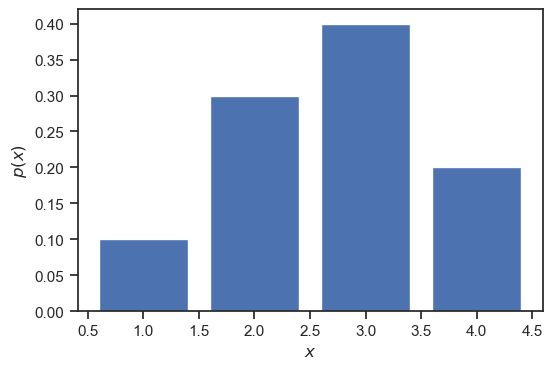

In [15]:
fig, ax = plt.subplots()
ax.bar(xs, X.pmf(xs))
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$");

Let's now compute the expectation of a function of $X$.
Say, $Y = e^X$.
The formula is:

$$
\mathbb{E}[e^X] = \sum_x e^x p(x).
$$

Here is how you can do this sumation mannually:

In [16]:
E_eX = np.sum(np.exp(xs) * X.pmf(xs))
print(f"E[exp(X)] = {E_eX:.2f}")

E[exp(X)] = 21.44


What if we wanted to find the variance of $Y = e^X$.
We have to use this formula:

$$
\mathbb{V}[e^X] = \mathbb{E}\left[\left(e^{X}\right)^2\right] - \left\{\mathbb{E}\left[e^X\right]\right\}^2.
$$

Let's do it:

In [17]:
E_e2X = np.sum(np.exp(xs) ** 2 * X.pmf(xs))
V_eX = E_e2X - E_eX ** 2
print(f"V[exp(X)] = {V_eX:.2f}")

V[exp(X)] = 314.91


### Questions

+ Rerun all code segements above for the Categorical $X\sim \operatorname{Categorical}(0.1, 0.1, 0.4, 0.2, 0.2)$ taking values $1, 2, 3, 4$ and $5$.
+ Write code that finds the expectation of $\sin(X)$.
+ Write code that finds the variance of $\sin(X)$.

## The Binomial Distribution

Suppose that you tossing $n$ times a coin with probability of heads $\theta$ and let $X$ be the number of heads.
The random variable $X$ is called the binomial random variable.
We write:

$$
X\sim B(n, \theta).
$$

It is easy to show that its pmf is:

$$
p(X = k) = {n\choose{k}}\theta^k(1-\theta)^{n-k},
$$

where ${n\choose{k}}$ is the number of $k$ combinations out of $n$ elements:

$$
{n\choose{k}} = \frac{n!}{k!(n-k)!}.
$$

Here is how to define the binomial in scipy.stats:

In [18]:
n = 5       
theta = 0.6
X = st.binom(n, theta)

Here are some samples:

In [19]:
print(X.rvs(100))

[4 2 2 1 3 3 4 5 4 4 4 2 3 2 1 2 2 3 3 2 3 3 4 3 2 2 4 2 5 3 2 0 4 1 4 3 2
 4 1 3 3 2 3 4 4 2 1 5 2 4 2 3 4 3 2 2 2 5 2 2 4 5 3 4 4 3 4 2 1 0 3 2 4 3
 3 3 2 3 1 2 5 4 1 2 1 2 3 2 2 3 3 3 4 3 3 4 2 2 2 2]


Here is the expectation:

In [20]:
print(f"E[X] = {X.expect():.2f}")

E[X] = 3.00


And the variance:

In [21]:
print(f"V[X] = {X.var():1.2f}")

V[X] = 1.20


Let's draw the PMF:

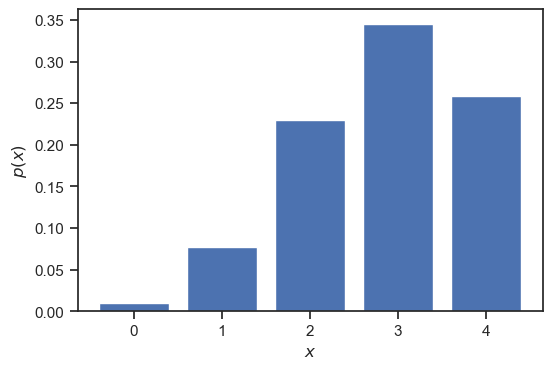

In [22]:
fig, ax = plt.subplots()
xs = range(n)
ax.bar(xs, X.pmf(xs))
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$");

### Questions

+ Start increasing the number of trials $n$. Gradually take it up to $n=100$. How does the resulting pmf look like?
This starts to look like a bell curve. And indeed it is!

## The Poisson Distribution

The Poisson distribution models the number of times an event occurs in an interval of space or time.
For example, a Poisson random variable $X$ may be:

+ The number earthquakes greater than 6 Richter occuring over the next 100 years.
+ The number of major floods over the next 100 years.
+ The number of patients arriving at the emergency room during the night shift.
+ The number of electrons hitting a detector in a specific time interval.

The Poisson is a good model when the following assumptions are true:
+ The number of times an event occurs in an interval takes values $0,1,2,\dots$.
+ Events occur independently.
+ The probability that an event occurs is constant per unit of time.
+ The average rate at which events occur is constant.
+ Events cannot occur at the same time.

When these assumptions are valid, we can write:

$$
X\sim \operatorname{Pois}(\lambda),
$$

where $\lambda>0$ is the rate with each the events occur.
The pmf of the Poisson is:

$$
p(X=k) = \frac{\lambda^ke^{-\lambda}}{k!}.
$$

The expectation of the Poisson is:

$$
\mathbb{E}[X] = \sum_{k=0}^\infty k p(X=k) = \lambda.
$$

The variance is:

$$
\mathbb{V}[X] = \dots = \lambda.
$$

Let's look at a specific example.
Historical data show that at a given region a major earthquake occurs once every 100 years on average.
What is the probability that $k$ such earthquakes will occur within the next 100 years.
Let $X$ be the random variable corresponding to the number of earthquakes over the next 100 years.
Assuming the Poisson model is valid, the rate parameter is $\lambda = 1$ and we have:

$$
X\sim \operatorname{Pois}(1).
$$

The probabilities are:

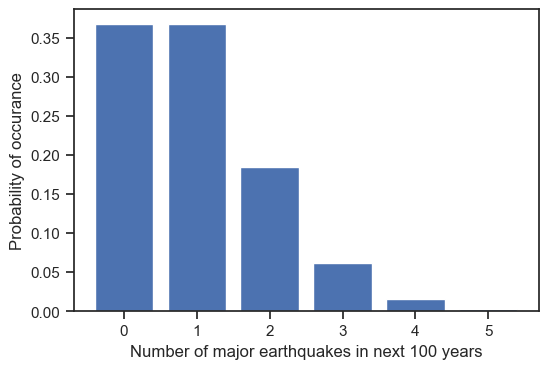

In [23]:
X = st.poisson(1.0)
ks = range(6)
fig, ax = plt.subplots()
ax.bar(ks, X.pmf(ks))
ax.set_xlabel('Number of major earthquakes in next 100 years')
ax.set_ylabel('Probability of occurance');

### Questions

+ How would the rate parameter $\lambda$ change if the rate with each major earthquakes occured in the past was 2 every 100 years? Plot the pmf of the new Poisson random variable. You may have to add more points in the x-axis.